**Regression** is method of predicting the relationship between a target variable(outcome, dependent variable, result variable) and one or more independent response variables(predictor's, independent variables) The most common statistical analysis is linear regression where there is a linear relationship explained by the model. We are working with Simple Linear Regression Model and understanding the statistics used in assessing the model prediction.

In [8]:
#importing libraries

#for reading data and plotting the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn is the most common statistical/machine learning library used, widely used in production code.
from sklearn.linear_model import LinearRegression

#using the magic command to plot all plots inline/inside the notebook.
%matplotlib inline

In [2]:
#Reading the data into pandas dataframe object
data = pd.read_csv('.\Exploratory-Analysis\data\Advertising.csv')

In [3]:
# Displaying a sample from data set. As you can see the data has default indexing + an additional untitled column representing the actual index
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# Rereading the data with index_col parameter
#index_col informs pandas dataframe object whether to use a index column by default or not. as we are giving 0, it means False - do not use it. 
data = pd.read_csv('.\Exploratory-Analysis\data\Advertising.csv', index_col=0)

In [5]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


The **objective** here is to understand how advertisement impacts Sales <br>

Few questions answered in below analysis: <br>

What is training and testing data ? <br>
How is linear regresion model used from sklearn library and model fit to the data ? <br>
What are some of the important features that can be used in predicting the Sales ? <br>
What are some of the metrics used for evaluation of the model ?

Some basic information about the data set

**Features/Independent Variables** 
<br>

*TV*: Amount of \\$ spent by giving ads on the TV as a communication medium and how are Sales affected <br>
*Radio* Amount of \\$ spent by giving ads on the Radio  <br>
*Newspaper*: Amount of \\$ spent by giving news paper based ads. <br>

**Target Variables** <br>

Sales: This would be the Sales number impacted due to different advertisements

**The model is fit means the parameters inside the model are estimated using the training data and these predicted parameter values are used in predicting the test data**

If we have to speak in terms of Hypothesis Testing:

Our 
Null Hypothesis: There is no relation between Sales figures and amount spent in advertisements via different mediums <br>
Alternative Hypothesis: There is a strong relation between Sales and TV,Radio and Newspaper ad spendings


In [ ]:
data.shape

In [6]:
# This method is to check if any columns return True boolean. If none return True, there are no NaN/Null values in dataframe

data.isnull().head()

,TV,radio,newspaper,sales
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False


In [ ]:
# Supposedly if there was 1 entry in Sales with NaN

# Alogrithm
#    - Create a bool series of the NaN row using isnull functionality
#    - Seperate the NaN row and display it as dataframe
#    - Fill the missing value or drop it

# bool_series = pd.isnull(data['sales'])
# data[bool_series]

# to display the inverse of Null/NaN rows viz/i.e Not Null values
# This function would return True for all numerical values and False for NaN/Null values

# data.notnull()

# Similarly to show all non Nan/Null values

# Alogrithm
#    - Create a bool series of the non-NaN row using notnull functionality
#    - Seperate the non-NaN row and display it as dataframe

# bool_series = pd.notnull(data['sales'])
# data[bool_series]

In [ ]:
# for Filling missing values we use fillna, replace and interpolate functions

# Filling missing values with 1 value - data.fillna(0)
# Filling null values with previous one - data.fillna(method = 'pad')
# Filling null values with next ones data.fillna(method = 'bfill')
# Filling with a spefic text value data['sales'].fillna('No Value', inplace=True)
# Replacing a NaN value throughout data.replace(to_replace = np.nan,value = 0)
# Dropping rows with atleast 1 NaN in any column data.dropna() 

## Visualizing the data using seaborn

**Seaborn** is a tool built upon Matplotlib and used for visualizing. Seaborn cann be installed by using pip or conda install

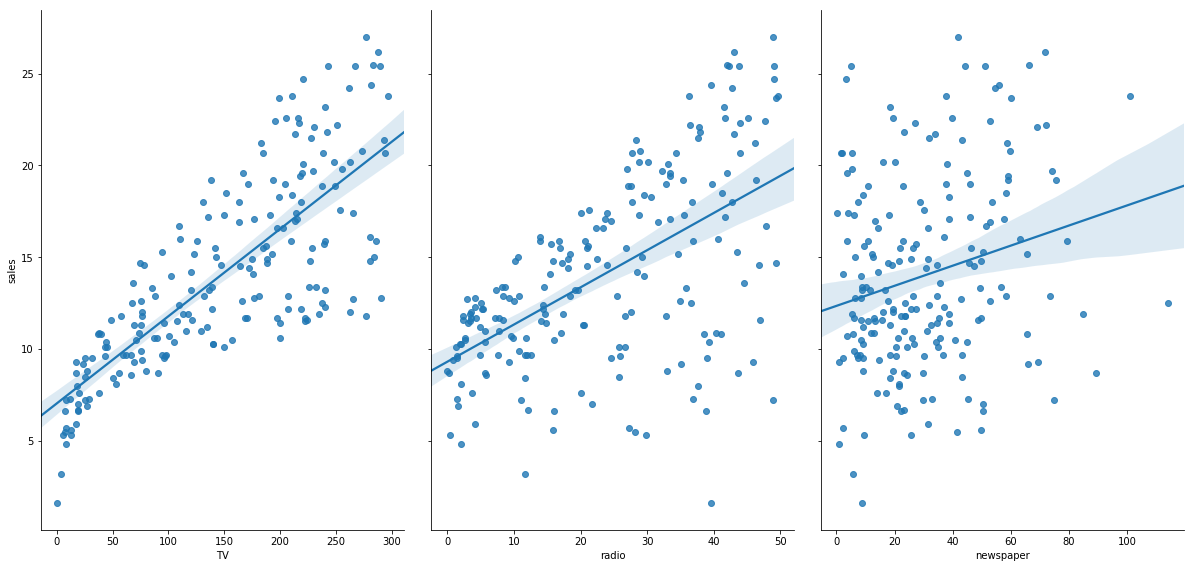

In [20]:
sns.pairplot(data, x_vars = ['TV', 'radio', 'newspaper'], y_vars = ['sales'], height=8, aspect =0.7, kind= 'reg' )

**Linear Regression**

Assumptions
    1. A linear relationship between the predictors and response variable.
    2. No multicollinearity between predictor variables.
    3. Response variable is normally distributed. Check for any pattterns in Residual plots.

Pros: It is well understood, requires no tuning parameters, highly interpretable


The equation is given as:<br>
$y_i = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + e_i$

where

$ y_i$ = Target/Response variable <br>
$ \beta_i $= is the Coefficient of each Predictor variable  <br>
$ \beta_0 $= is the intercept <br>
$ e_i$ = residual error 

Population Regression Line coefficient estimates would be the same as sample regression line

In this case

$y_i  = \beta_0 + \beta_1 * TV + \beta_2 * radio + \beta_3 * newspaper $ 

The beta's are model coefficients. These are estimated by fitting the model to training data using OLS (Ordinary Least Squares) criterion. As per OLS, the goal is to minimize the residual sum of square errors. Then the fitted model is used to do the predictions. 